Algoritmos genéticos são utilizados para otimizar funções. Nesta aula vamos implementar um algorimto genético utilizando o framwork DEAP, em python.


## Um exemplo prático de uso de algoritmo genético

### TPOT

Há muitos componentes que você deve considerar antes de resolver um problema de aprendizado de máquina, alguns dos quais incluem preparação de dados, seleção e engenharia de atributos, seleção e validação de modelos, ajuste de hiperparâmetros, etc. Em teoria, você pode encontrar e aplicar uma infinidade de técnicas para cada um desses componentes, mas todos eles podem funcionar de forma diferente para diferentes conjuntos de dados. O desafio é encontrar a combinação de técnicas com melhor desempenho para que você possa minimizar o erro em suas previsões. Esta é a principal razão pela qual hoje em dia as pessoas estão trabalhando para desenvolver algoritmos e plataformas de Auto-ML para que qualquer pessoa, sem nenhuma experiência em aprendizado de máquina, possa construir modelos sem gastar muito tempo ou esforço. Uma dessas plataformas está disponível como uma biblioteca python: TPOT. Você pode considerar o TPOT seu Data Science Assistant. TPOT é uma ferramenta de Aprendizado de Máquina Automatizado que otimiza pipelines de aprendizado de máquina usando um algoritmo genético. Ele automatizará a parte mais tediosa do aprendizado de máquina, explorando de forma inteligente milhares de pipelines possíveis para encontrar o melhor para seus dados.

Para o TPOT, cada pipeline de aprendizagem de máquina é um indivíduo/cromossomo. Assim, precisaremos criar um população de pipelines de AM para que o algorimto genético possa otimizá-lo. A função fitness será baseada em algum métrica como acurácia, f1-score, recall, etc. Os operadores de crossover e mutação funcionam intuitivamente combinando os pipelines e realizando mutações nas combinações. Abaixo uma figura das etapas que são automatizadas pelo TPOT:

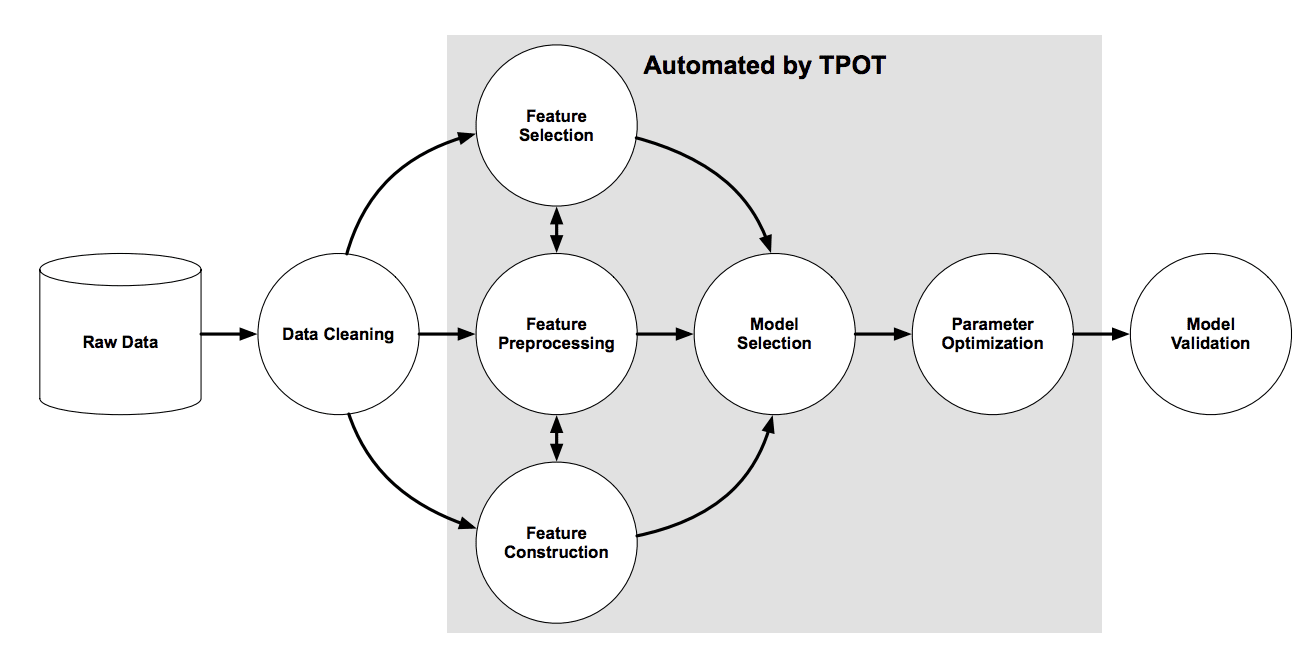

### Dataset

Neste exemplo, vamos utilizar o famoso [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).

A ideia é classificar o tipo de flor com base no largura e comprimento do petal e sepal das flores. As flores podem ser classificadas em três tipos: Iris Setosa, Iris Versicolor, Istis Virginica. 

#### Instalação

In [2]:
%pip install 


  Using cached TPOT-0.11.7-py3-none-any.whl (87 kB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
     --------------------------------------- 42.2/42.2 MB 90.9 kB/s eta 0:00:00
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached deap-1.3.3.tar.gz (1.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached stopit-1.1.2.tar.gz (18 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pandas-2.0.1-cp311-cp311-win_amd64.whl (10.6 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     -----------------------------            52.5/70.9 MB ? eta -:--:--


ERROR: Wheel 'xgboost' located at C:\Users\SOFTEX\AppData\Local\Temp\pip-unpack-rbpyuf86\xgboost-1.7.5-py3-none-win_amd64.whl is invalid.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
tpot

In [ ]:
# Verificando a versão utilizada
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


In [ ]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()
iris.data[0:5], iris.target

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    train_size=0.75, test_size=0.25, shuffle = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=50, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9826086956521738

Generation 2 - Current best internal CV score: 0.9913043478260869

Generation 3 - Current best internal CV score: 0.9913043478260869

Generation 4 - Current best internal CV score: 0.9913043478260869

Generation 5 - Current best internal CV score: 0.9913043478260869

Best pipeline: MLPClassifier(input_matrix, alpha=0.001, learning_rate_init=0.1)
0.9736842105263158


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [ ]:
tpot.export('tpot_iris_pipeline.py')